# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Subsetting
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Questions
#### 5. Hypotheses

### 1. Importing Visualization Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check the version of matplotlib
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Define path
path = r'C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6'

In [7]:
# Import data

df = pd.read_csv(r"C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6\Boat_Sales\02 Data\Prepared Data\boat_data_clean3.csv")

In [8]:
df.head()

,Unnamed: 0,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_in_CHF
0,1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3295
1,2,3770,Sport Boat,Marine power boats,new boat from stock,2008,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770
2,4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3209
3,5,3650,Sport Boat,Linder power boats,new boat from stock,2008,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,CHF,3650
4,10,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,CHF,3500


### 2. Data Subsetting

In [10]:
df.columns

Index(['Unnamed: 0', 'Price', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days', 'Currency', 'Price_in_CHF'],
      dtype='object')

In [11]:
#subset dataframe
df2 = df[['Boat Type', 'Manufacturer', 'Type', 'Year Built', 
          'Length', 'Width', 'Material', 'Location', 'Number of views last 7 days','Price_in_CHF']]

In [13]:
df2.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_in_CHF
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3295
1,Sport Boat,Marine power boats,new boat from stock,2008,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3770
2,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3209
3,Sport Boat,Linder power boats,new boat from stock,2008,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132,3650
4,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,3500


### 3. Exploring Relationships

Questions:
1.	What are the characteristics of the most viewed boats in the last 7 days?
2.	Get the most expensive boats the most views?
3.	What are the geographical position of the most viewed boats?


### Correlations:

In [15]:
#subset dataframe only numeric columns
df3 = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days','Price_in_CHF']]

In [16]:
# Create a correlation matrix using pandas

df3.corr()

,Year Built,Length,Width,Number of views last 7 days,Price_in_CHF
Year Built,1.000000,-0.094029,-0.084619,-0.192413,0.120985
Length,-0.094029,1.000000,0.922017,-0.158832,0.645651
Width,-0.084619,0.922017,1.000000,-0.174012,0.562147
Number of views last 7 days,-0.192413,-0.158832,-0.174012,1.000000,-0.042367
Price_in_CHF,0.120985,0.645651,0.562147,-0.042367,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

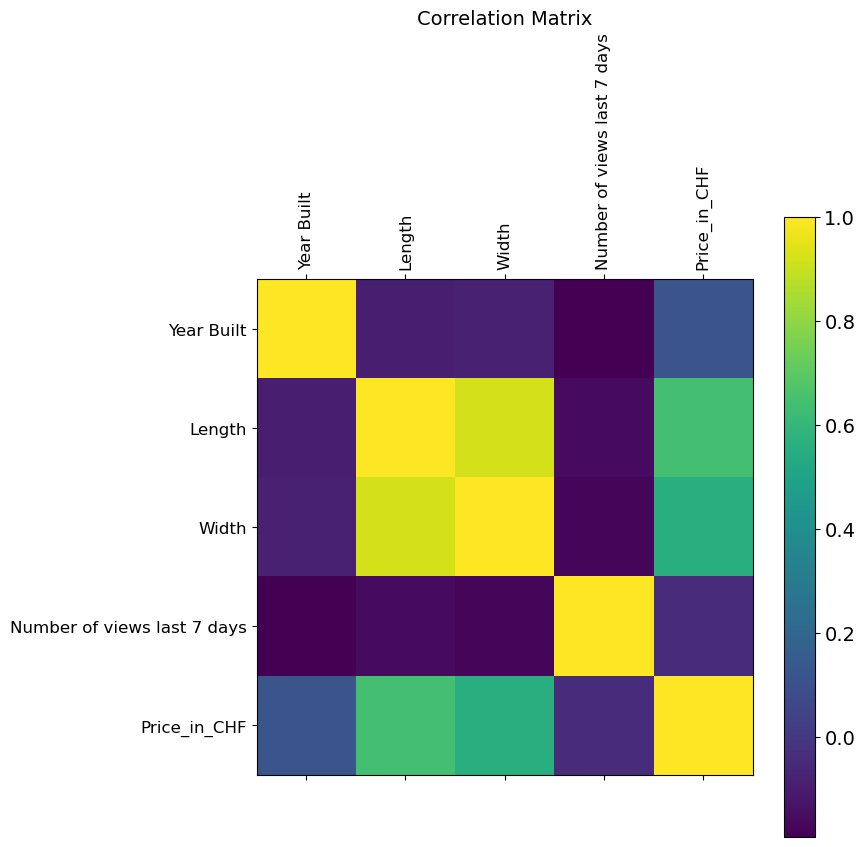

In [20]:
# plot heatmap
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df3.corr(), fignum=f.number) # type of plot
plt.xticks(range(df3.shape[1]), df3.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df3.shape[1]), df3.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Correlation coefficient categories:
0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship

#### Relationships in the dataframe
Very strong: Lenght and Width

Strong: Length and Price_in_CHF
        Width and Price_in_CHF
        
Moderate: nothing

Weak: Views and Year Built
      Price_in_CHF and Year Built
      Length and Views
      Width and Views
      
No relationship: Views and Price_in_CHF
                 Width and Year Built
                 Length and Year Built


### Scatterplots

In [22]:
df3.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'Price_in_CHF'],
      dtype='object')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


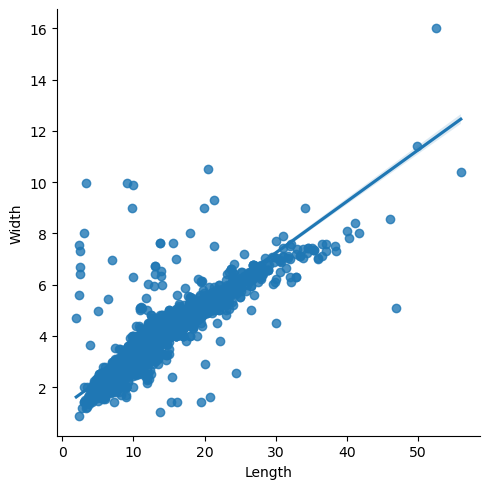

In [23]:
# Create a scatterplot for the "Lenght" and "Width" columns in seaborn

sns.lmplot(x = 'Length', y = 'Width', data = df3)

Discuss the output: a simple linear proportionality can be observed between the values of length and width.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


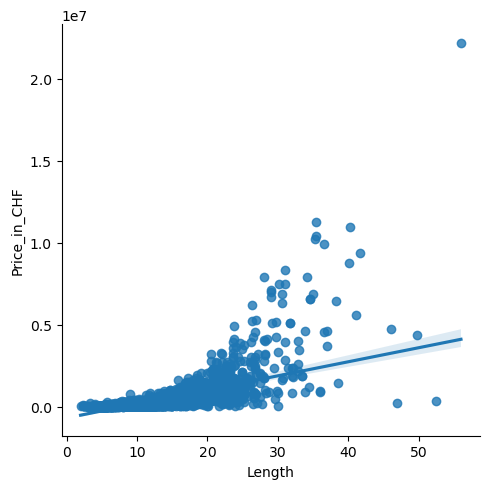

In [24]:
# Create a scatterplot for the "Lenght" and "'Price_in_CHF'" columns in seaborn

sns.lmplot(x = 'Length', y = 'Price_in_CHF', data = df3)

The notation '1e7' in the label of axis y in Python typically represents values using scientific notation. In this case, it means 1 multiplied by 10 to the power of 7, which is 10,000,000. This notation is often used to handle large numbers more conveniently on visualizations, especially when dealing with data that spans a wide range of magnitudes. It helps to maintain clarity in the visualization by expressing values in a compact and standardized form on the tick labels.

Discuss the output: with an increase in the length to the ship, we can expect an increase in the price of the ship, although this is a slower increase than what we could observe in relation to the width and length

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


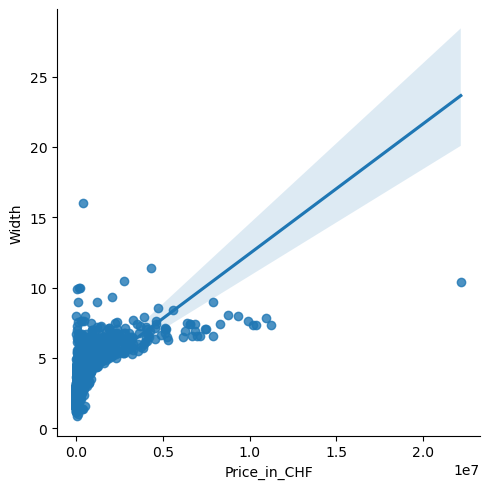

In [25]:
# Create a scatterplot for the "'Price_in_CHF'" and "Width" columns in seaborn

sns.lmplot(x = 'Price_in_CHF', y = 'Width', data = df3)

The notation '1e7' in the label of axis x in Python typically represents values using scientific notation. In this case, it means 1 multiplied by 10 to the power of 7, which is 10,000,000. This notation is often used to handle large numbers more conveniently on visualizations, especially when dealing with data that spans a wide range of magnitudes. It helps to maintain clarity in the visualization by expressing values in a compact and standardized form on the tick labels.

Discuss the output: apart from one or two outliers, the increase in the width of the ship is also related to the increase in the price of the ship, which is not surprising, since there is a very close correlation between length and width.

### Pair Plot

In [26]:
#subset for the pair plot
df4 = df[['Length', 'Width', 'Price_in_CHF']]

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


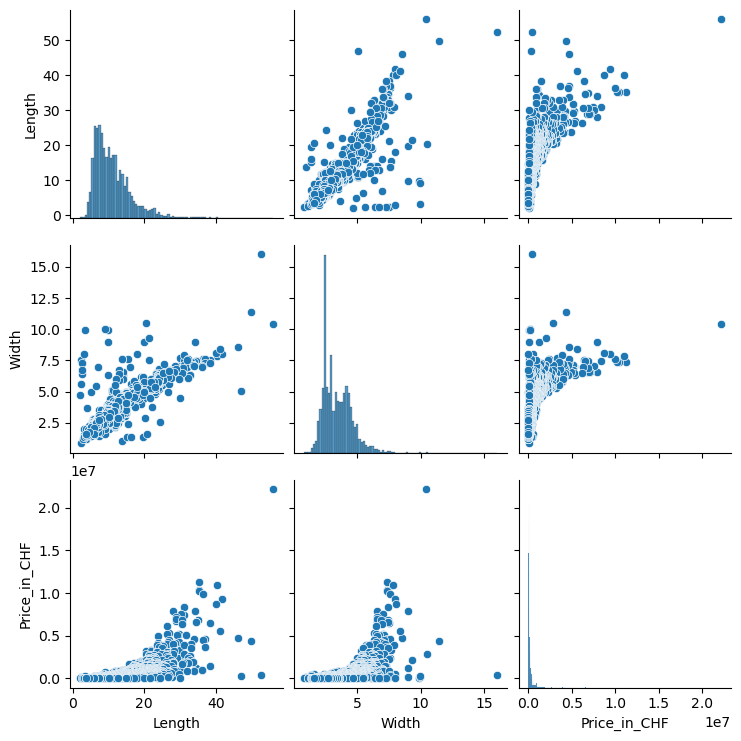

In [27]:
# Create a pair plot 

g = sns.pairplot(df4)

1e7 in plots of Price means: multiply with 10 000 000.

### Categorical Plots

<Axes: xlabel='Number of views last 7 days', ylabel='Count'>

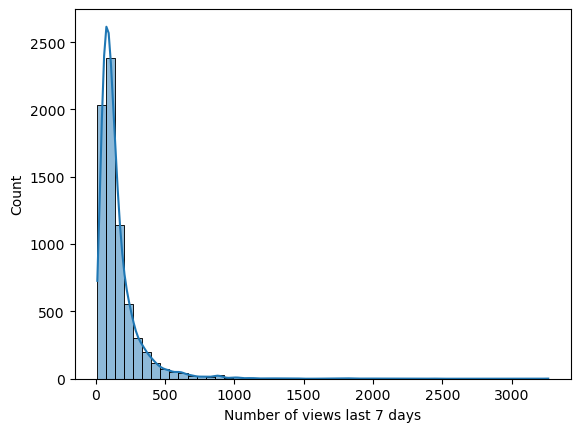

In [32]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the view ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Number of views last 7 days'], bins = 50, kde = True)

The histogram is very right skewed. I would create 5 categories:
'Very low number views'      0-72
'Low number of views'        73-112
'Middle number of views'     113-185
'High number of views'       186-750
'Very high number of views'  >750

In [35]:
df['Number of views last 7 days'].describe()

count    7019.000000
mean      159.909104
std       167.153110
min        13.000000
25%        72.000000
50%       112.000000
75%       185.000000
max      3263.000000
Name: Number of views last 7 days, dtype: float64

In [56]:
df.loc[df['Number of views last 7 days'] <= 72, 'Views category'] = 'Very low number of views'

In [43]:
df.loc[(df['Number of views last 7 days'] >= 73) & (df['Number of views last 7 days'] < 113), 'Views category'] = 'Low number of views'

In [44]:
df.loc[(df['Number of views last 7 days'] >= 113) & (df['Number of views last 7 days'] < 186), 'Views category'] = 'Middle number of views'

In [45]:
df.loc[(df['Number of views last 7 days'] >= 186) & (df['Number of views last 7 days'] < 751), 'Views category'] = 'High number of views'

In [46]:
df.loc[df['Number of views last 7 days'] >= 751, 'Views category'] = 'Very high number of views'

In [57]:
df['Views category'].value_counts(dropna = False)

Views category
Low number of views          1768
Very low number of views     1759
Middle number of views       1742
High number of views         1659
Very high number of views      91
Name: count, dtype: int64

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


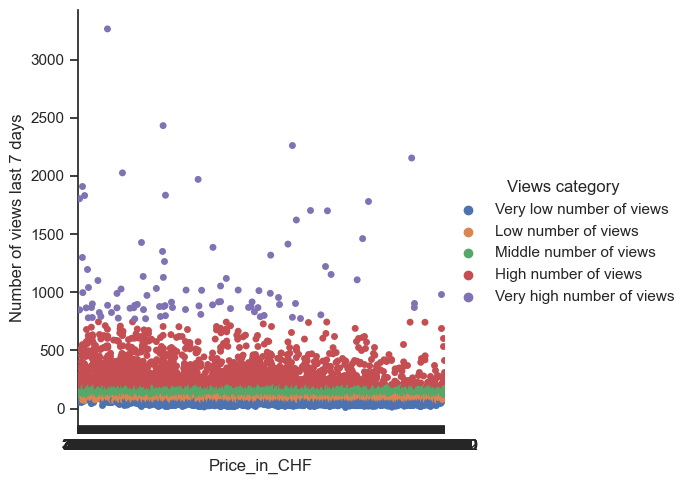

In [59]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Price_in_CHF", y="Number of views last 7 days", hue="Views category", data=df)

### 4. Questions

1.	What are the characteristics of the most viewed boats in the last 7 days?
    I can not answer yet
    
2.	Get the most expensive boats the most views?
    Price is definitely not related to the number of views, this is also clearly visible in the figure above, 
    since there are all kinds of view categories in all kinds of price categories.
    
3.	What are the geographical position of the most viewed boats?
    I can not answer yet.

### 5. Hypotheses

1. Bigger ships have more views.
2. Younger boats have more views.
3. Ships in the Americas have more views.